In [1]:
#!/usr/bin/env python
# -*-coding:utf-8 -*-
'''
@Time    :   17/11/2023 22:41:34
@Author  :   Marty 
'''

# Pulizia
from IPython import get_ipython
get_ipython().magic('clear')
get_ipython().magic('reset -f')

#Librerie
from IPython.display import display, Markdown
import numpy as np
from matplotlib import pyplot as plt
#plt.rcParams['figure.dpi'] = 70
from scipy.optimize import curve_fit

import math 
import pandas as pd
import os

/var/folders/gs/p2p59ns16hlgpqv_027665gm0000gn/T/ipykernel_4471/3469771187.py:10: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('clear')
/var/folders/gs/p2p59ns16hlgpqv_027665gm0000gn/T/ipykernel_4471/3469771187.py:11: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -f')


### Devo ricavare un nuovo coefficiente di diffusione con la medesima forma funzionale di Matzke sulla base dei dati sperimentali riportati nel paper di White 2001, prima dell'analisi frattale. 

## **Original data**

In [2]:
temperature = np.linspace(500, 2000, 1000)
W= 25
boltzmann_constant = 1.380649e-23           #J/K
#fission_rate=1.5e18
fission_rate =  (6e-23 * W)/8.0e-40        #conversione ricavata dal D3: 6e-23 * W = 8.0e-40 * fission_rate 

#Turnbull su White 2001 e TRANSURANUS manual
d1 = 7.6e-10 * np.exp(-35000/temperature); 
d2 = 3.22e-16 * np.sqrt(W) * np.exp(-13800 / temperature);
d3 = 6e-23 * W;
diff_turnbull = d1 + d2 + d3;

#Turnubull su SCIANTIX
d1_sciantix = 7.6e-10 * np.exp(-4.86e-19 / (boltzmann_constant * temperature));
d2_sciantix = 4.0 * 1.41e-25 * np.sqrt(fission_rate) * np.exp(-1.91e-19 / (boltzmann_constant * temperature)); #mettendoci il numero 8.0 * 1.41e-25 la curva rossa con i pallini prende perfettamente la curva di Turnbull su White 2001
d3_sciantix = 8.0e-40 * fission_rate;
diff_turnbull_sciantix = d1_sciantix+d2_sciantix+d3_sciantix

#Testata l'uguaglianza:
#np.exp(-35000/temperature) = np.exp(-4.86e-19 / (boltzmann_constant * temperature))
#np.exp(-13800 / temperature) = np.exp(-1.91e-19 / (boltzmann_constant * temperature))

#Matzke
diff_matzke = 5.0e-08 * np.exp(-40262.0/temperature)
#termine atermico aggiuntivo a Matzke presente nel TRANSURANUS manual
diff_athermal=1.086e-15 * np.exp(-16506/temperature)


In [3]:
#Import Excel
data=pd.read_excel("White2001.xlsx", sheet_name = 'Original data')
full_circle_x  = pd.DataFrame(data.loc[:,'full circle x'])[0:9]
full_circle_y  = pd.DataFrame(data.loc[:,'full circle y'])[0:9]
full_square_x  = pd.DataFrame(data.loc[:,'full square x'])[0:7]
full_square_y  = pd.DataFrame(data.loc[:,'full square y'])[0:7]
full_triangle_up_x  = pd.DataFrame(data.loc[:,'full triangle up x'])[0:11]
full_triangle_up_y  = pd.DataFrame(data.loc[:,'full triangle up y'])[0:11]
full_triangle_down_x  = pd.DataFrame(data.loc[:,'full triangle down x'])[0:42]
full_triangle_down_y  = pd.DataFrame(data.loc[:,'full triangle down y'])[0:42]

empty_circle_y  = pd.DataFrame(data.loc[:,'empty circle y'])[0:14]
empty_circle_x  = pd.DataFrame(data.loc[:,'empty circle x'])[0:14]
empty_square_x  = pd.DataFrame(data.loc[:,'empty square x'])[0:13]
empty_square_y  = pd.DataFrame(data.loc[:,'empty square y'])[0:13]
empty_triangle_up_x  = pd.DataFrame(data.loc[:,'empty triangle up x'])[0:14]
empty_triangle_up_y  = pd.DataFrame(data.loc[:,'empty triangle up y'])[0:14]
empty_triangle_down_x  = pd.DataFrame(data.loc[:,'empty triangle down x'])[0:11]
empty_triangle_down_y  = pd.DataFrame(data.loc[:,'empty triangle down y'])[0:11]
empty_diamond_y  = pd.DataFrame(data.loc[:,'empty diamond y'])[0:6]
empty_diamond_x  = pd.DataFrame(data.loc[:,'empty diamond x'])[0:6]

white_d1d2d3_x = pd.DataFrame(data.loc[:,'d1+d2+d3 x'])[0:22]
white_d1d2d3_y = pd.DataFrame(data.loc[:,'d1+d2+d3 y'])[0:22]
white_d1d2_x = pd.DataFrame(data.loc[:,'d1+d2 x'])[0:30]
white_d1d2_y = pd.DataFrame(data.loc[:,'d1+d2 y'])[0:30]

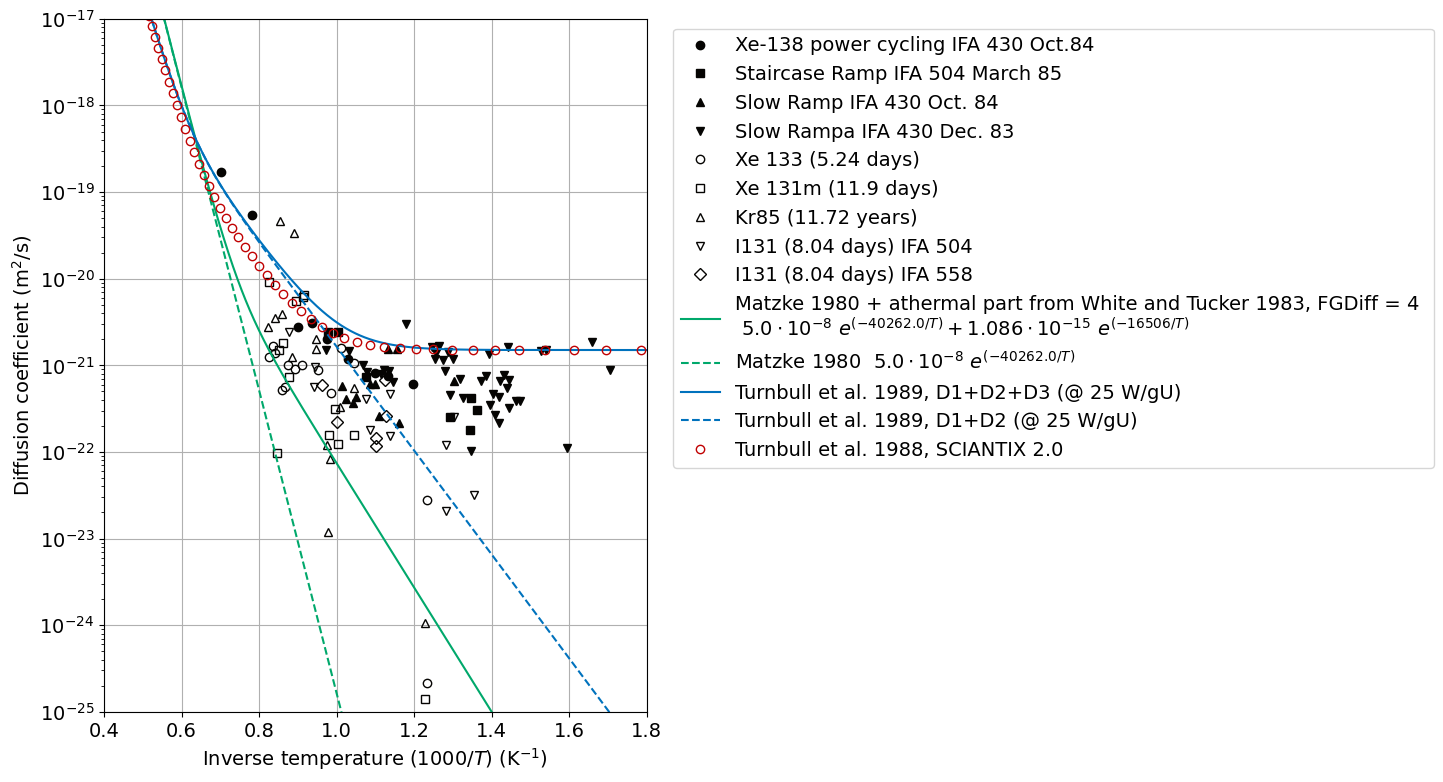

In [6]:
plt.figure(figsize=(7,9))
plt.plot(full_circle_x,full_circle_y, 'o', label='Xe-138 power cycling IFA 430 Oct.84', color= '#050402')
plt.plot(full_square_x,full_square_y, 's', label='Staircase Ramp IFA 504 March 85', color= '#050402')
plt.plot(full_triangle_up_x,full_triangle_up_y, '^', label='Slow Ramp IFA 430 Oct. 84', color= '#050402')
plt.plot(full_triangle_down_x,full_triangle_down_y, 'v', label='Slow Rampa IFA 430 Dec. 83', color= '#050402')

plt.plot(empty_circle_x,empty_circle_y, 'o', label='Xe 133 (5.24 days)', color= '#050402', markerfacecolor='none')
plt.plot(empty_square_x,empty_square_y, 's', label='Xe 131m (11.9 days)', color= '#050402',markerfacecolor='none')
plt.plot(empty_triangle_up_x,empty_triangle_up_y, '^', label='Kr85 (11.72 years)', color= '#050402',markerfacecolor='none')
plt.plot(empty_triangle_down_x,empty_triangle_down_y, 'v', label='I131 (8.04 days) IFA 504', color= '#050402',markerfacecolor='none')
plt.plot(empty_diamond_x,empty_diamond_y, 'D', label='I131 (8.04 days) IFA 558', color= '#050402',markerfacecolor='none')

#plt.plot(white_d1d2d3_x, white_d1d2d3_y, color='#FF7F50', linewidth=1.5, label='White 2001, D1+D2+D3')
#plt.plot(white_d1d2_x, white_d1d2_y, '--', color='#FF7F50', linewidth=1.5, label='White 2001, D1+D2')

plt.plot(1000/temperature, diff_matzke+diff_athermal, color='#00A86B', linewidth=1.5, label='Matzke 1980 + athermal part from White and Tucker 1983, FGDiff = 4 \n $5.0 \cdot 10^{-8} \ e^{(-40262.0/T)} + 1.086 \cdot 10^{-15} \ e^{(-16506/T)}$')
plt.plot(1000/temperature, diff_matzke,'--' , color='#00A86B' ,linewidth=1.5, label='Matzke 1980  $5.0 \cdot 10^{-8} \ e^{(-40262.0/T)}$')
plt.plot(1000/temperature, d1+d2+d3, color='#0072bd', linewidth=1.5, label='Turnbull et al. 1989, D1+D2+D3 (@ 25 W/gU)')
plt.plot(1000/temperature, d1+d2, '--', color='#0072bd', linewidth=1.5, label='Turnbull et al. 1989, D1+D2 (@ 25 W/gU)')
plt.plot(1000/temperature, diff_turnbull_sciantix, 'o', color='#c00102', linewidth=1.5, label='Turnbull et al. 1988, SCIANTIX 2.0',markerfacecolor='none', markevery=20)

#plt.plot(1000/temperature, 2e-13 * np.exp(-20000/temperature), 'd', color='#c00102', linewidth=1.5, label='fit a caso',markerfacecolor='none', markevery=20)

#ricavata a tentativi 2e-13 * np.exp(-20000/temperature), magari ne ricavo una più pulita con la regressione lineare

plt.grid()
plt.xlabel('Inverse temperature (1000/$T$) (K$^{-1}$)', fontsize=14)
plt.ylabel('Diffusion coefficient (m$^2$/s)', fontsize=14)
#plt.title('',fontsize=16)
plt.yscale("log")
plt.ylim(1e-25, 1e-17)
plt.xlim(0.4,1.8)
plt.xticks(fontsize=14)
plt.yticks([1e-25,1e-24, 1e-23, 1e-22,1e-21,1e-20,1e-19,1e-18,1e-17],fontsize=14)
plt.legend(loc='upper center', bbox_to_anchor=(1.75, 1.0), fancybox=True, shadow=False, ncol=1, fontsize=14)
plt.savefig('1.pdf', bbox_inches="tight")

### **Fit** 
$$
A \cdot e^{(\frac{B}{T})}
$$

[5.78741701e-27 1.20574928e+01]
Fit A = 5.787417e-27
Fit B = 12.05749
Equazione ricavata= 5.787417e-27 * exp(12.05749*z).
Standard deviation error_A = 4.388778e-27
Standard deviation error_B = 4.388778e-27


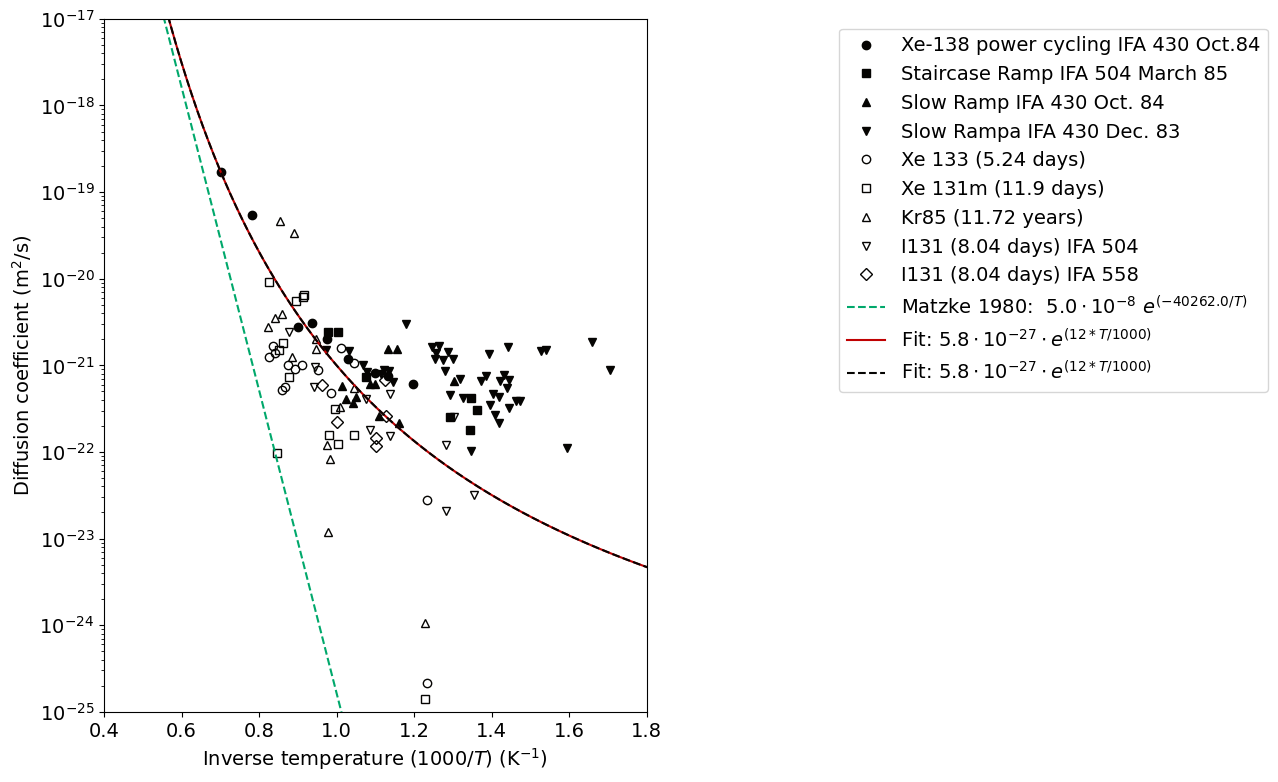

In [34]:
plt.figure(figsize=(7,9))
#plt.plot(xData,yData, 'o', label='Xe 133 (5.24 days)', color= '#050402', markerfacecolor='none')
plt.plot(full_circle_x,full_circle_y, 'o', label='Xe-138 power cycling IFA 430 Oct.84', color= '#050402')
plt.plot(full_square_x,full_square_y, 's', label='Staircase Ramp IFA 504 March 85', color= '#050402')
plt.plot(full_triangle_up_x,full_triangle_up_y, '^', label='Slow Ramp IFA 430 Oct. 84', color= '#050402')
plt.plot(full_triangle_down_x,full_triangle_down_y, 'v', label='Slow Rampa IFA 430 Dec. 83', color= '#050402')

plt.plot(empty_circle_x,empty_circle_y, 'o', label='Xe 133 (5.24 days)', color= '#050402', markerfacecolor='none')
plt.plot(empty_square_x,empty_square_y, 's', label='Xe 131m (11.9 days)', color= '#050402',markerfacecolor='none')
plt.plot(empty_triangle_up_x,empty_triangle_up_y, '^', label='Kr85 (11.72 years)', color= '#050402',markerfacecolor='none')
plt.plot(empty_triangle_down_x,empty_triangle_down_y, 'v', label='I131 (8.04 days) IFA 504', color= '#050402',markerfacecolor='none')
plt.plot(empty_diamond_x,empty_diamond_y, 'D', label='I131 (8.04 days) IFA 558', color= '#050402',markerfacecolor='none')
plt.plot(1000/temperature, diff_matzke,'--' , color='#00A86B' ,linewidth=1.5, label='Matzke 1980:  $5.0 \cdot 10^{-8} \ e^{(-40262.0/T)}$')

def model_f(z,a,b): 
    return a*np.exp(b/z)

data=pd.read_excel("White2001.xlsx", sheet_name = 'Original data')
xData  = np.array(data.loc[:,'data per fit x'])[0:127]
yData  = np.array(data.loc[:,'data per fit y'])[0:127]

parameters, covariance = curve_fit(model_f, xData, yData, p0=[5e-08,1])
print(parameters)
fit_a=parameters[0]
fit_b=parameters[1]

print(F'Fit A = {fit_a:e}')
print(F'Fit B = {fit_b:.5f}')
print(F'Equazione ricavata= {fit_a:e} * exp({fit_b:.5f}*z).')

SE = np.sqrt(np.diag(covariance))
SE_A = SE[0]
SE_B = SE[1]

print(F'Standard deviation error_A = {SE_A:e}')
print(F'Standard deviation error_B = {SE_A:e}')

x = np.linspace(0.4,1.8,100)

plt.plot(x, model_f(x, fit_a, fit_b), label = 'Fit: $5.8 \cdot 10^{-27} \cdot e^{(12 * T/1000)}$', color='#c00102', linewidth = 1.5)
plt.plot(1000/temperature, 5.787417e-27*np.exp(12.05749*temperature/1000), '--', color = '#050402',label = 'Fit: $5.8 \cdot 10^{-27} \cdot e^{(12 * T/1000)}$',linewidth = 1.5)

plt.yscale("log")
plt.xlabel('Inverse temperature (1000/$T$) (K$^{-1}$)', fontsize=14)
plt.ylabel('Diffusion coefficient (m$^2$/s)', fontsize=14)
plt.ylim(1e-25, 1e-17)
plt.xlim(0.4,1.8)
plt.xticks(fontsize=14)
plt.yticks([1e-25,1e-24, 1e-23, 1e-22,1e-21,1e-20,1e-19,1e-18,1e-17],fontsize=14)
plt.legend(loc='upper center', bbox_to_anchor=(1.75, 1.0), fancybox=True, shadow=False, ncol=1, fontsize=14)

### **Fit** 
$$
 A \cdot e^{(\frac{B*T}{1000})}
$$

[ 2.94951313e-13 -2.04873624e+04]
Fit A = 2.949513e-13
Fit B = -20487.36244
Equazione ricavata= 2.949513e-13 * exp(-20487.36244*z).
Standard deviation error_A = 1.980026e-13
Standard deviation error_B = 1.980026e-13


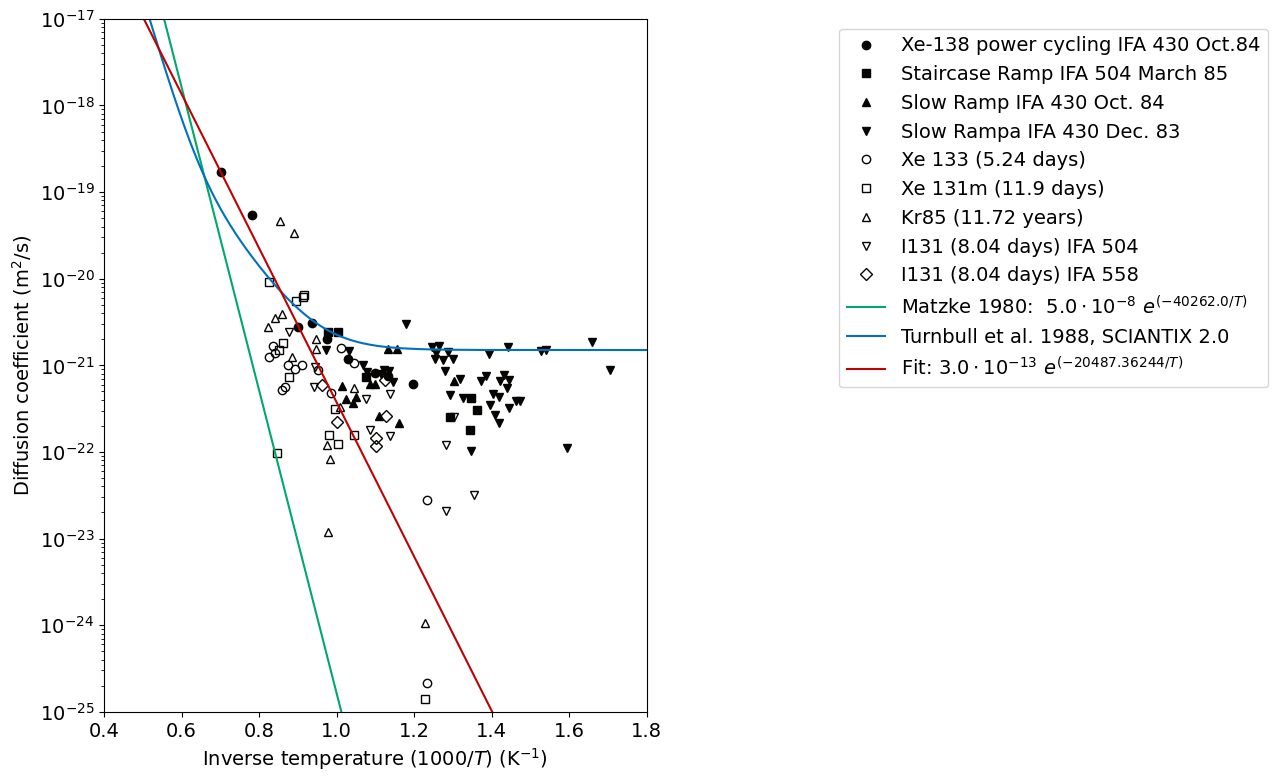

In [9]:
plt.figure(figsize=(7,9))
#plt.plot(xData,yData, 'o', label='Xe 133 (5.24 days)', color= '#050402', markerfacecolor='none')
plt.plot(full_circle_x,full_circle_y, 'o', label='Xe-138 power cycling IFA 430 Oct.84', color= '#050402')
plt.plot(full_square_x,full_square_y, 's', label='Staircase Ramp IFA 504 March 85', color= '#050402')
plt.plot(full_triangle_up_x,full_triangle_up_y, '^', label='Slow Ramp IFA 430 Oct. 84', color= '#050402')
plt.plot(full_triangle_down_x,full_triangle_down_y, 'v', label='Slow Rampa IFA 430 Dec. 83', color= '#050402')

plt.plot(empty_circle_x,empty_circle_y, 'o', label='Xe 133 (5.24 days)', color= '#050402', markerfacecolor='none')
plt.plot(empty_square_x,empty_square_y, 's', label='Xe 131m (11.9 days)', color= '#050402',markerfacecolor='none')
plt.plot(empty_triangle_up_x,empty_triangle_up_y, '^', label='Kr85 (11.72 years)', color= '#050402',markerfacecolor='none')
plt.plot(empty_triangle_down_x,empty_triangle_down_y, 'v', label='I131 (8.04 days) IFA 504', color= '#050402',markerfacecolor='none')
plt.plot(empty_diamond_x,empty_diamond_y, 'D', label='I131 (8.04 days) IFA 558', color= '#050402',markerfacecolor='none')
plt.plot(1000/temperature, diff_matzke, color='#00A86B' ,linewidth=1.5, label='Matzke 1980:  $5.0 \cdot 10^{-8} \ e^{(-40262.0/T)}$')
plt.plot(1000/temperature, diff_turnbull_sciantix, color='#0072bd', linewidth=1.5, label='Turnbull et al. 1988, SCIANTIX 2.0',markerfacecolor='none', markevery=20)

def model_f(z,a,b): 
    return a*np.exp((b*z)/1000)

data=pd.read_excel("White2001.xlsx", sheet_name = 'Original data')
xData  = np.array(data.loc[:,'data per fit x'])[0:127]
yData  = np.array(data.loc[:,'data per fit y'])[0:127]

parameters, covariance = curve_fit(model_f, xData, yData, p0=[5e-08,1])
print(parameters)
fit_a=parameters[0]
fit_b=parameters[1]

print(F'Fit A = {fit_a:e}')
print(F'Fit B = {fit_b:.5f}')
print(F'Equazione ricavata= {fit_a:e} * exp({fit_b:.5f}*z).')

SE = np.sqrt(np.diag(covariance))
SE_A = SE[0]
SE_B = SE[1]

print(F'Standard deviation error_A = {SE_A:e}')
print(F'Standard deviation error_B = {SE_A:e}')

x = np.linspace(0.4,1.8,100)

plt.plot(x, model_f(x, fit_a, fit_b), label = 'Fit: $3.0 \cdot 10^{-13} \ e^{(-20487.36244/T)}$', color='#c00102', linewidth = 1.5)
#plt.plot(1000/temperature, 2.949513e-13*np.exp(-20487.36244/temperature), '--',color = '#050402', markersize=3, markevery=0.5, label = 'Fit: $3.0 \cdot 10^{-13} \ e^{(-20487.36244/T)}$',linewidth = 1.5)


plt.yscale("log")
plt.xlabel('Inverse temperature (1000/$T$) (K$^{-1}$)', fontsize=14)
plt.ylabel('Diffusion coefficient (m$^2$/s)', fontsize=14)
plt.ylim(1e-25, 1e-17)
plt.xlim(0.4,1.8)
plt.xticks(fontsize=14)
plt.yticks([1e-25,1e-24, 1e-23, 1e-22,1e-21,1e-20,1e-19,1e-18,1e-17],fontsize=14)
plt.legend(loc='upper center', bbox_to_anchor=(1.75, 1.0), fancybox=True, shadow=False, ncol=1, fontsize=14)
plt.savefig('2.pdf', bbox_inches="tight")

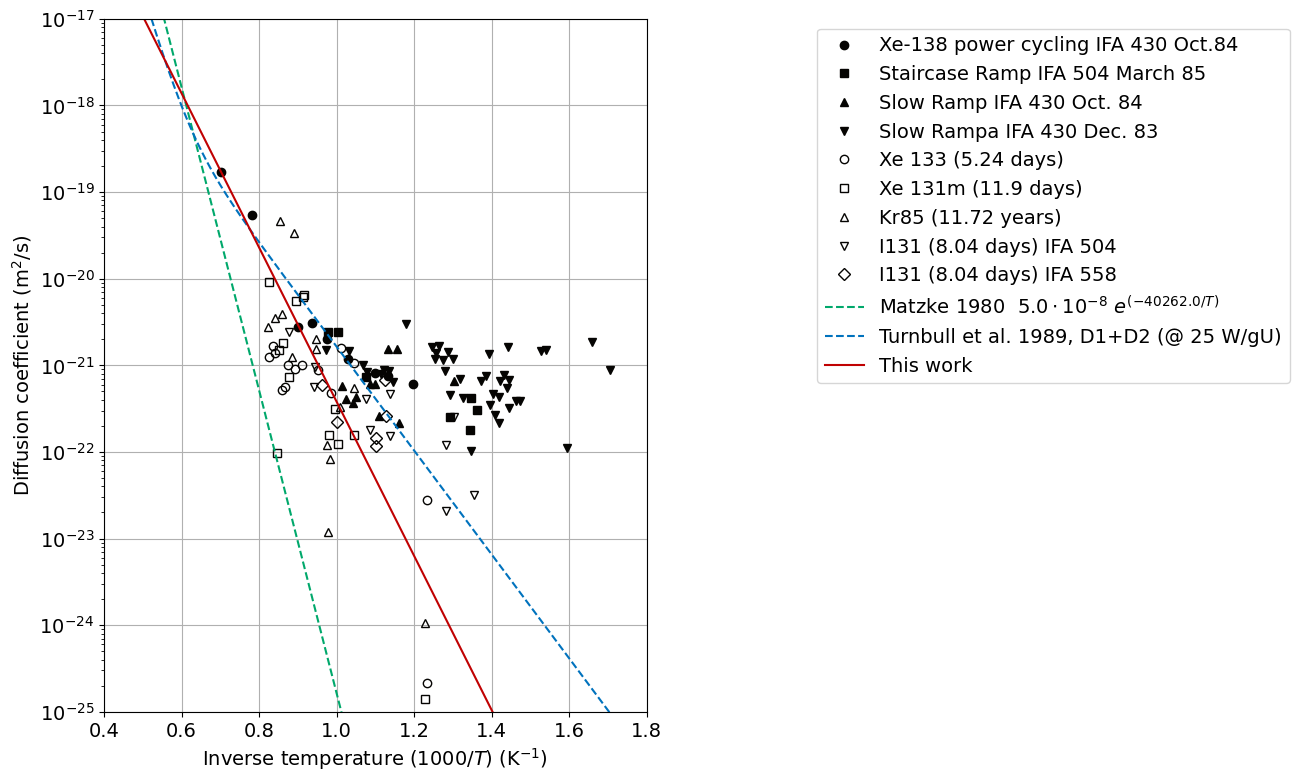

In [31]:
plt.figure(figsize=(7,9))
plt.plot(full_circle_x,full_circle_y, 'o', label='Xe-138 power cycling IFA 430 Oct.84', color= '#050402')
plt.plot(full_square_x,full_square_y, 's', label='Staircase Ramp IFA 504 March 85', color= '#050402')
plt.plot(full_triangle_up_x,full_triangle_up_y, '^', label='Slow Ramp IFA 430 Oct. 84', color= '#050402')
plt.plot(full_triangle_down_x,full_triangle_down_y, 'v', label='Slow Rampa IFA 430 Dec. 83', color= '#050402')

plt.plot(empty_circle_x,empty_circle_y, 'o', label='Xe 133 (5.24 days)', color= '#050402', markerfacecolor='none')
plt.plot(empty_square_x,empty_square_y, 's', label='Xe 131m (11.9 days)', color= '#050402',markerfacecolor='none')
plt.plot(empty_triangle_up_x,empty_triangle_up_y, '^', label='Kr85 (11.72 years)', color= '#050402',markerfacecolor='none')
plt.plot(empty_triangle_down_x,empty_triangle_down_y, 'v', label='I131 (8.04 days) IFA 504', color= '#050402',markerfacecolor='none')
plt.plot(empty_diamond_x,empty_diamond_y, 'D', label='I131 (8.04 days) IFA 558', color= '#050402',markerfacecolor='none')

#plt.plot(white_d1d2d3_x, white_d1d2d3_y, color='#FF7F50', linewidth=1.5, label='White 2001, D1+D2+D3')
#plt.plot(white_d1d2_x, white_d1d2_y, '--', color='#FF7F50', linewidth=1.5, label='White 2001, D1+D2')

#plt.plot(1000/temperature, diff_matzke+diff_athermal, color='#00A86B', linewidth=1.5, label='Matzke 1980 + athermal part from White and Tucker 1983, FGDiff = 4 \n $5.0 \cdot 10^{-8} \ e^{(-40262.0/T)} + 1.086 \cdot 10^{-15} \ e^{(-16506/T)}$')
plt.plot(1000/temperature, diff_matzke,'--' , color='#00A86B' ,linewidth=1.5, label='Matzke 1980  $5.0 \cdot 10^{-8} \ e^{(-40262.0/T)}$')
#plt.plot(1000/temperature, d1+d2+d3, color='#0072bd', linewidth=1.5, label='Turnbull et al. 1989, D1+D2+D3 (@ 25 W/gU)')
plt.plot(1000/temperature, d1+d2, '--', color='#0072bd', linewidth=1.5, label='Turnbull et al. 1989, D1+D2 (@ 25 W/gU)')
#plt.plot(1000/temperature, diff_turnbull_sciantix, 'o', color='#c00102', linewidth=1.5, label='Turnbull et al. 1988, SCIANTIX 2.0',markerfacecolor='none', markevery=20)
#plt.plot(1000/temperature, 2e-13 * np.exp(-20000/temperature), 'd', color='#c00102', linewidth=1.5, label='Turnbull et al. 1988, SCIANTIX 2.0',markerfacecolor='none', markevery=20)
plt.plot(1000/temperature, 3e-13*np.exp(-20487.36244/temperature), color='#c00102', linewidth=1.5, label='This work')

#plt.plot(1000/temperature, 2.949512e-13 * np.exp(-(20487.36196)/temperature), 'D',linewidth=1.5, color='#c00102', label='This work', markerfacecolor='none', markevery=20)
#plt.plot(1000/temperature, 5.787417e-27 * np.exp(12.05749*temperature/1000), 'D',linewidth=1.5, color='#c00102', label='This work', markerfacecolor='none', markevery=20)



plt.grid()
plt.xlabel('Inverse temperature (1000/$T$) (K$^{-1}$)', fontsize=14)
plt.ylabel('Diffusion coefficient (m$^2$/s)', fontsize=14)
#plt.title('',fontsize=16)
plt.yscale("log")
plt.ylim(1e-25, 1e-17)
plt.xlim(0.4,1.8)
plt.xticks(fontsize=14)
plt.yticks([1e-25,1e-24, 1e-23, 1e-22,1e-21,1e-20,1e-19,1e-18,1e-17],fontsize=14)
plt.legend(loc='upper center', bbox_to_anchor=(1.75, 1.0), fancybox=True, shadow=False, ncol=1, fontsize=14)
plt.savefig('Fit.pdf', bbox_inches="tight")

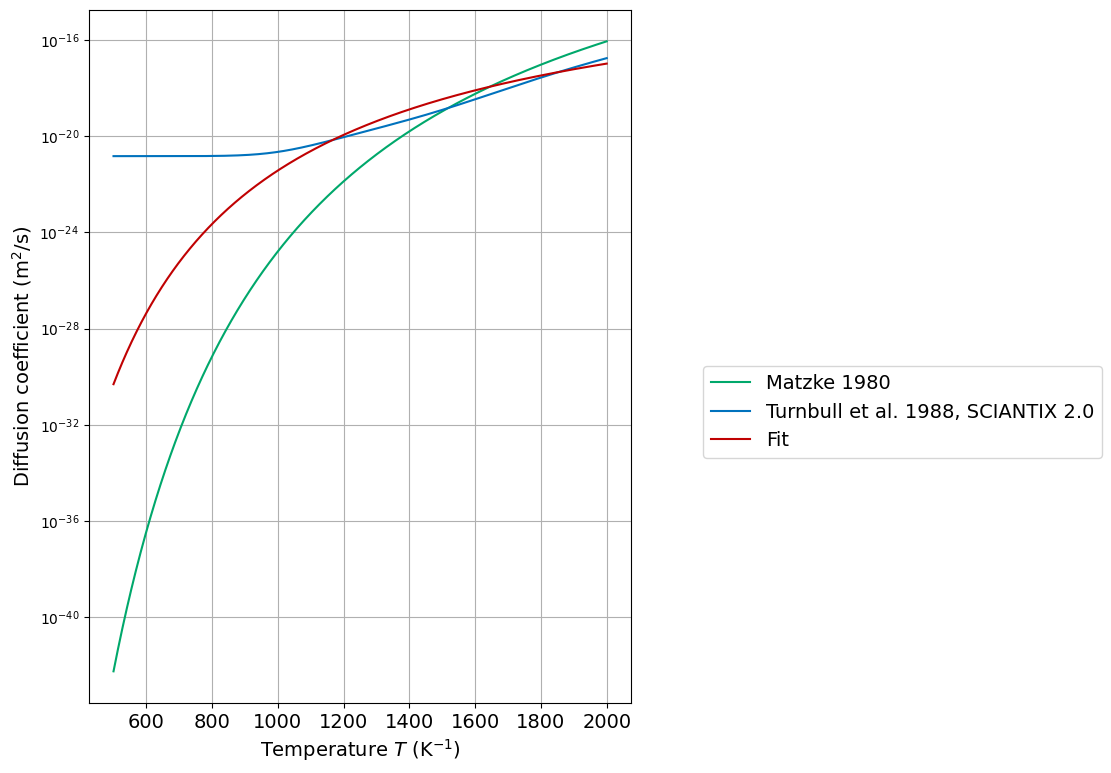

In [13]:
plt.figure(figsize=(7,9))
#plt.plot(white_d1d2d3_x, white_d1d2d3_y, color='#FF7F50', linewidth=1.5, label='White 2001, D1+D2+D3')
#plt.plot(white_d1d2_x, white_d1d2_y, '--', color='#FF7F50', linewidth=1.5, label='White 2001, D1+D2')

#plt.plot(temperature, diff_matzke+diff_athermal, color='#00A86B', linewidth=1.5, label='Matzke 1980 + athermal part from White and Tucker 1983, FGDiff = 4 ')
plt.plot(temperature, diff_matzke, color='#00A86B' ,linewidth=1.5, label='Matzke 1980')
#plt.plot(temperature, d1+d2+d3, color='#0072bd', linewidth=1.5, label='Turnbull et al. 1989, D1+D2+D3 (@ 25 W/gU)')
#plt.plot(temperature, d1+d2, '--', color='#0072bd', linewidth=1.5, label='Turnbull et al. 1989, D1+D2 (@ 25 W/gU)')
#plt.plot(temperature, diff_turnbull_sciantix, 'o', color='#c00102', linewidth=1.5, label='Turnbull et al. 1988, SCIANTIX 2.0',markerfacecolor='none', markevery=20)
#plt.plot(temperature, 2e-13 * np.exp(-20000/temperature), 'd', color='#c00102', linewidth=1.5, label='Turnbull et al. 1988, SCIANTIX 2.0',markerfacecolor='none', markevery=20)
plt.plot(temperature, diff_turnbull_sciantix, color='#0072bd', linewidth=1.5, label='Turnbull et al. 1988, SCIANTIX 2.0',markerfacecolor='none', markevery=20)

plt.plot(temperature, 3e-13*np.exp(-20487.36244/temperature), color='#c00102', linewidth=1.5, label='Fit')

#plt.plot(temperature, 2.949512e-13 * np.exp(-(20487.36196)/temperature), 'D',linewidth=1.5, color='#c00102', label='This work', markerfacecolor='none', markevery=20)
#plt.plot(temperature, 5.787417e-27 * np.exp(12.05749*temperature/1000), 'D',linewidth=1.5, color='#c00102', label='This work', markerfacecolor='none', markevery=20)


plt.grid()
plt.xlabel('Temperature $T$ (K$^{-1}$)', fontsize=14)
plt.ylabel('Diffusion coefficient (m$^2$/s)', fontsize=14)
#plt.title('',fontsize=16)
plt.yscale("log")
#plt.ylim(1e-25, 1e-17)
#plt.xlim(0.4,1.8)
plt.xticks(fontsize=14)
#plt.yticks([1e-25,1e-24, 1e-23, 1e-22,1e-21,1e-20,1e-19,1e-18,1e-17],fontsize=14)
plt.legend(loc='upper center', bbox_to_anchor=(1.5, 0.5), fancybox=True, shadow=False, ncol=1, fontsize=14)
plt.savefig('3.pdf', bbox_inches="tight")

Usare Matxke sarebbe sicuramente sbagliato, chiunque leggendo il paper se ne sa qualcosa capisce che non ha senso. Anche Turnbull non li prende bene i dati di White (il pallino e il quadrato vuoti in basso li sbaglia di davvero tanto). Nel paper scriverò che ho fittato i dati di white per adoperare un coefficiente d diffusione e in questo caso adoperiamo un coefficiente di diffusione con la sola dipendenza dalla temperatura visto che il ROM effettua la linearizzazione rispetto alla temperatura. 

Dal grafico si vede bene che a 0.4 Matzke sovrastima di gran lunga. 

## **Fractal analysis**

In [ ]:
temperature = np.linspace(500, 2000, 1000)
W= 25
boltzmann_constant = 1.380649e-23           #J/K
#fission_rate=1.5e18
fission_rate =  (6e-23 * W)/8.0e-40        #conversione ricavata dal D3: 6e-23 * W = 8.0e-40 * fission_rate 

#Turnbull su White 2001 e TRANSURANUS manual
d1 = 7.6e-10 * np.exp(-35000/temperature); 
d2 = 3.22e-16 * np.sqrt(W) * np.exp(-13800 / temperature);
d3 = 6e-23 * W;
diff_turnbull = d1 + d2 + d3;

#Turnubull su SCIANTIX
d1_sciantix = 7.6e-10 * np.exp(-4.86e-19 / (boltzmann_constant * temperature));
d2_sciantix = 4.0 * 1.41e-25 * np.sqrt(fission_rate) * np.exp(-1.91e-19 / (boltzmann_constant * temperature)); #mettendoci il numero 8.0 * 1.41e-25 la curva rossa con i pallini prende perfettamente la curva di Turnbull su White 2001
d3_sciantix = 8.0e-40 * fission_rate;
diff_turnbull_sciantix = d1_sciantix+d2_sciantix+d3_sciantix

#Testata l'uguaglianza:
#np.exp(-35000/temperature) = np.exp(-4.86e-19 / (boltzmann_constant * temperature))
#np.exp(-13800 / temperature) = np.exp(-1.91e-19 / (boltzmann_constant * temperature))

#Matzke
diff_matzke = 5.0e-08 * np.exp(-40262.0/temperature)
#termine atermico aggiuntivo a Matzke presente nel TRANSURANUS manual
diff_athermal=1.086e-15 * np.exp(-16506/temperature)


In [3]:
#Import Excel
data=pd.read_excel("White2001.xlsx", sheet_name = 'Fractal analysis')
full_circle_x  = pd.DataFrame(data.loc[:,'full circle x'])[0:9]
full_circle_y  = pd.DataFrame(data.loc[:,'full circle y'])[0:9]
full_square_x  = pd.DataFrame(data.loc[:,'full square x'])[0:7]
full_square_y  = pd.DataFrame(data.loc[:,'full square y'])[0:7]
full_triangle_up_x  = pd.DataFrame(data.loc[:,'full triangle up x'])[0:13]
full_triangle_up_y  = pd.DataFrame(data.loc[:,'full triangle up y'])[0:13]
full_triangle_down_x  = pd.DataFrame(data.loc[:,'full triangle down x'])[0:39]
full_triangle_down_y  = pd.DataFrame(data.loc[:,'full triangle down y'])[0:39]

empty_circle_y  = pd.DataFrame(data.loc[:,'empty circle y'])[0:12]
empty_circle_x  = pd.DataFrame(data.loc[:,'empty circle x'])[0:12]
empty_square_x  = pd.DataFrame(data.loc[:,'empty square x'])[0:12]
empty_square_y  = pd.DataFrame(data.loc[:,'empty square y'])[0:12]
empty_triangle_up_x  = pd.DataFrame(data.loc[:,'empty triangle up x'])[0:12]
empty_triangle_up_y  = pd.DataFrame(data.loc[:,'empty triangle up y'])[0:12]
empty_triangle_down_x  = pd.DataFrame(data.loc[:,'empty triangle down x'])[0:9]
empty_triangle_down_y  = pd.DataFrame(data.loc[:,'empty triangle down y'])[0:9]
empty_diamond_y  = pd.DataFrame(data.loc[:,'empty diamond y'])[0:3]
empty_diamond_x  = pd.DataFrame(data.loc[:,'empty diamond x'])[0:3]

white_d1d2d3_x = pd.DataFrame(data.loc[:,'d1+d2+d3 x'])[0:30]
white_d1d2d3_y = pd.DataFrame(data.loc[:,'d1+d2+d3 y'])[0:30]
white_d1d2_x = pd.DataFrame(data.loc[:,'d1+d2 x'])[0:39]
white_d1d2_y = pd.DataFrame(data.loc[:,'d1+d2 y'])[0:39]

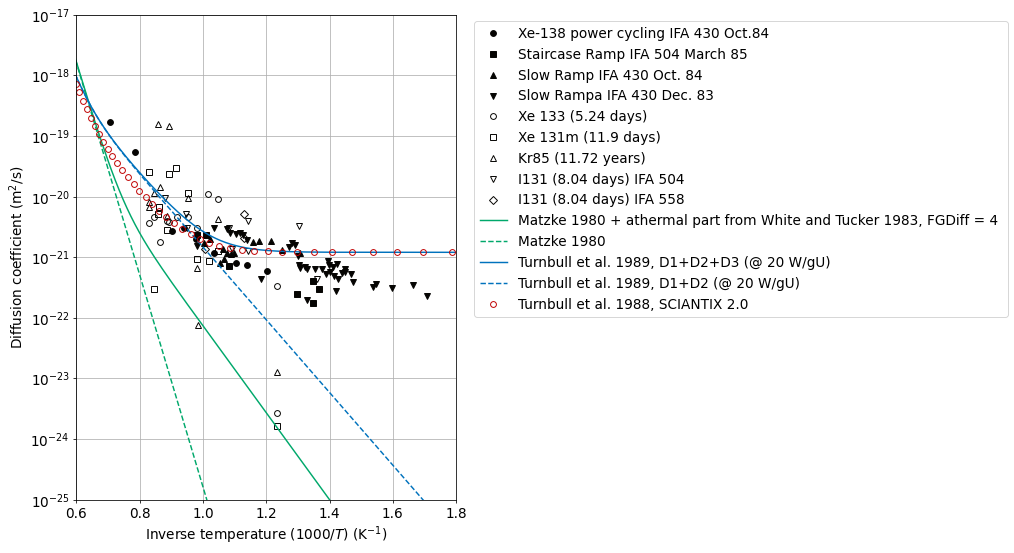

In [55]:
plt.figure(figsize=(7,9))
plt.plot(full_circle_x,full_circle_y, 'o', label='Xe-138 power cycling IFA 430 Oct.84', color= '#050402')
plt.plot(full_square_x,full_square_y, 's', label='Staircase Ramp IFA 504 March 85', color= '#050402')
plt.plot(full_triangle_up_x,full_triangle_up_y, '^', label='Slow Ramp IFA 430 Oct. 84', color= '#050402')
plt.plot(full_triangle_down_x,full_triangle_down_y, 'v', label='Slow Rampa IFA 430 Dec. 83', color= '#050402')

plt.plot(empty_circle_x,empty_circle_y, 'o', label='Xe 133 (5.24 days)', color= '#050402', markerfacecolor='none')
plt.plot(empty_square_x,empty_square_y, 's', label='Xe 131m (11.9 days)', color= '#050402',markerfacecolor='none')
plt.plot(empty_triangle_up_x,empty_triangle_up_y, '^', label='Kr85 (11.72 years)', color= '#050402',markerfacecolor='none')
plt.plot(empty_triangle_down_x,empty_triangle_down_y, 'v', label='I131 (8.04 days) IFA 504', color= '#050402',markerfacecolor='none')
plt.plot(empty_diamond_x,empty_diamond_y, 'D', label='I131 (8.04 days) IFA 558', color= '#050402',markerfacecolor='none')

# plt.plot(white_d1d2d3_x, white_d1d2d3_y, color='#FF7F50', linewidth=1.5, label='White 2001, D1+D2+D3')
# plt.plot(white_d1d2_x, white_d1d2_y, '--', color='#FF7F50', linewidth=1.5, label='White 2001, D1+D2')


plt.plot(1000/temperature, diff_matzke+diff_athermal, color='#00A86B', linewidth=1.5, label='Matzke 1980 + athermal part from White and Tucker 1983, FGDiff = 4 ')
plt.plot(1000/temperature, diff_matzke,'--' , color='#00A86B' ,linewidth=1.5, label='Matzke 1980')
plt.plot(1000/temperature, d1+d2+d3, color='#0072bd', linewidth=1.5, label='Turnbull et al. 1989, D1+D2+D3 (@ 20 W/gU)')
plt.plot(1000/temperature, d1+d2, '--', color='#0072bd', linewidth=1.5, label='Turnbull et al. 1989, D1+D2 (@ 20 W/gU)')
plt.plot(1000/temperature, diff_turnbull_sciantix, 'o', color='#c00102', linewidth=1.5, label='Turnbull et al. 1988, SCIANTIX 2.0',markerfacecolor='none', markevery=20)

#ricavata a tentativi 2e-13 * np.exp(-20000/temperature), magari en ricavo una più pulita con la regressione lineare

plt.grid()
plt.xlabel('Inverse temperature (1000/$T$) (K$^{-1}$)', fontsize=14)
plt.ylabel('Diffusion coefficient (m$^2$/s)', fontsize=14)
#plt.title('',fontsize=16)
plt.yscale("log")
plt.ylim(1e-25, 1e-17)
plt.xlim(0.6,1.8)
plt.xticks(fontsize=14)
plt.yticks([1e-25,1e-24, 1e-23, 1e-22,1e-21,1e-20,1e-19,1e-18,1e-17],fontsize=14)
plt.legend(loc='upper center', bbox_to_anchor=(1.75, 1.0), fancybox=True, shadow=False, ncol=1, fontsize=14)
plt.savefig('1.pdf', bbox_inches="tight")

Devo evidenziare il range di temperatura di SUPERFACT e poi dire che ci interessa prendere bene solo i valori in quel range perciò interpoliamo i dati con un'Arrhenius.

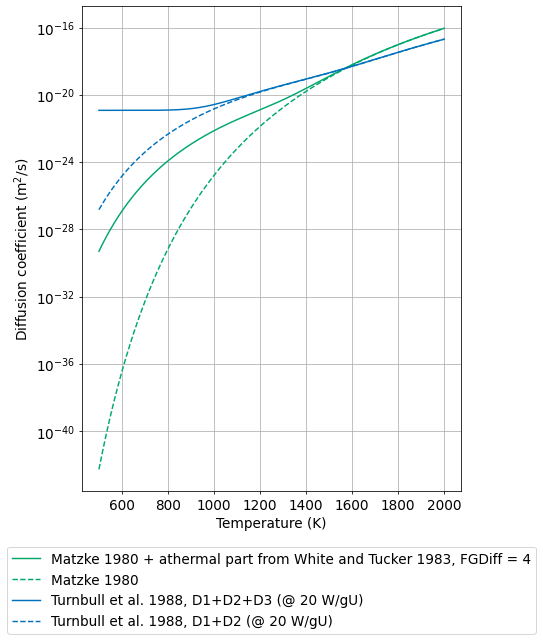

In [112]:
plt.figure(figsize=(7,9))
plt.plot(temperature, diff_matzke+diff_athermal, color='#00A86B', linewidth=1.5, label='Matzke 1980 + athermal part from White and Tucker 1983, FGDiff = 4')
plt.plot(temperature, diff_matzke, '--',color='#00A86B', linewidth=1.5, label='Matzke 1980')
plt.plot(temperature, d1+d2+d3, color='#0072bd', linewidth=1.5, label='Turnbull et al. 1988, D1+D2+D3 (@ 20 W/gU)')
plt.plot(temperature, d1+d2, '--', color='#0072bd', linewidth=1.5, label='Turnbull et al. 1988, D1+D2 (@ 20 W/gU)')

plt.grid()
plt.xlabel('Temperature (K)', fontsize=14)
plt.ylabel('Diffusion coefficient (m$^2$/s)', fontsize=14)
#plt.title('',fontsize=16)
plt.yscale("log")
#plt.ylim(1e-25, 1e-17)
# #plt.xlim(0.6,1.8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=False, ncol=1, fontsize=14)